
# Predictive Modeling for Diabetes Risk Using Health Indicators 

### Introduction

Diabetes has become a significant public health challenge, affecting millions of individuals worldwide and placing a considerable burden on healthcare systems. According to the Centers for Disease Control and Prevention (CDC), over 34 million Americans are currently living with diabetes, while an estimated 88 million are prediabetic, often unaware of their condition. The chronic nature of diabetes can lead to severe complications, including cardiovascular diseases, kidney failure, and even limb amputation. Thus, early detection and intervention are crucial to mitigate these risks and improve patient outcomes.

This project leverages the **Diabetes Health Indicators Dataset**, derived from the Behavioral Risk Factor Surveillance System (BRFSS), to develop predictive models for identifying individuals at risk of diabetes. The dataset contains extensive survey responses from thousands of participants, detailing various health indicators and behaviors related to diabetes risk. The objective is to apply various machine learning techniques to analyze these health indicators and assess their predictive capabilities regarding diabetes status.

The analysis will involve exploring the data, building and training multiple classification models, and evaluating their performance in accurately predicting diabetes risk. By employing methods such as logistic regression, decision trees, random forests, and XGBoost, the project aims to determine which model performs best and to provide insights into the most significant risk factors associated with diabetes. 

Furthermore, the findings of this research could inform healthcare policies and practices, contributing to the design of targeted interventions aimed at preventing diabetes and promoting healthier lifestyles within communities. For more information on the dataset and methodologies employed in this analysis, please refer to the [Kaggle Notebook](https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook).

## 1. Load Data 

Let's first import required libraries:


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

Let us import the data using pandas to create a DataFrame and show the first few rows.

In [6]:
data = pd.read_csv('diabetes.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Let now inpect the data types, and identify any potential issues, such as inconsistent data types.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

<h2 id="preprocessing"> 2. Data Cleaning </h2>


Let examine the dataset for any missing values

In [12]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Let now check for duplicate rows in the dataset.

In [14]:
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 23899


Let remove any duplicate rows, leaving only unique rows in the dataset. 

In [16]:
data = data.drop_duplicates()
print(f"Data shape after removing duplicates: {data.shape}")

Data shape after removing duplicates: (229781, 22)


We can ensuring that all duplicates were successfully removed.

In [18]:
duplicate_rows_after = data[data.duplicated()]
print(f"Number of duplicate rows after removal: {duplicate_rows_after.shape[0]}")

Number of duplicate rows after removal: 0


Also, we change the target data type to be an integer, as it is a requirement by the skitlearn algorithm

In [20]:
data.astype('int')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


## 3. Exploratory Data Analysis (EDA)

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,229781.0,0.325627,0.724623,0.0,0.0,0.0,0.0,2.0
HighBP,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0
Smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
PhysActivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0


We’ll look at the class distribution of the target variable (Diabetes_012)

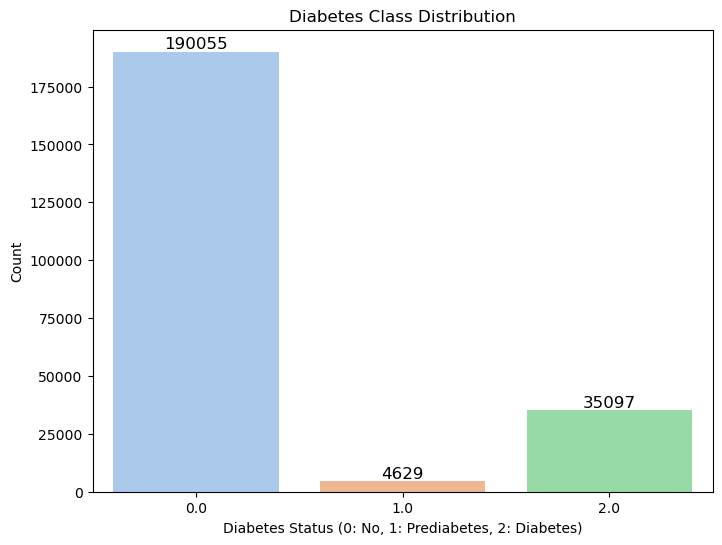

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize target class distribution
# Set a color palette
palette = sns.color_palette("pastel", n_colors=3)  # You can choose a palette with 3 distinct colors

# Visualize target class distribution
plt.figure(figsize=(8, 6))  # Set the figure size
ax = sns.countplot(x='Diabetes_012', data=data, palette=palette)
plt.title("Diabetes Class Distribution")
plt.xlabel("Diabetes Status (0: No, 1: Prediabetes, 2: Diabetes)")
plt.ylabel("Count")

# Add counts on top of each bar with different colors
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12, color='black')

plt.show()

<b>Note:</b> This distribution indicates that the class representing no diabetes dominates the dataset, while the prediabetes class is underrepresented, which could lead to the model favoring the majority class during training.

In [227]:
# If we decide to implement resampling techniques, such as SMOTE, to balance classes.
#from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
#X = data.drop('Diabetes_012', axis=1)
#y = data['Diabetes_012']
#X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

# Check new class distribution
#sns.countplot(x=y_resampled)
#plt.title("Resampled Class Distribution")
#plt.show()

We visualize outliers in the BMI feature using boxplot

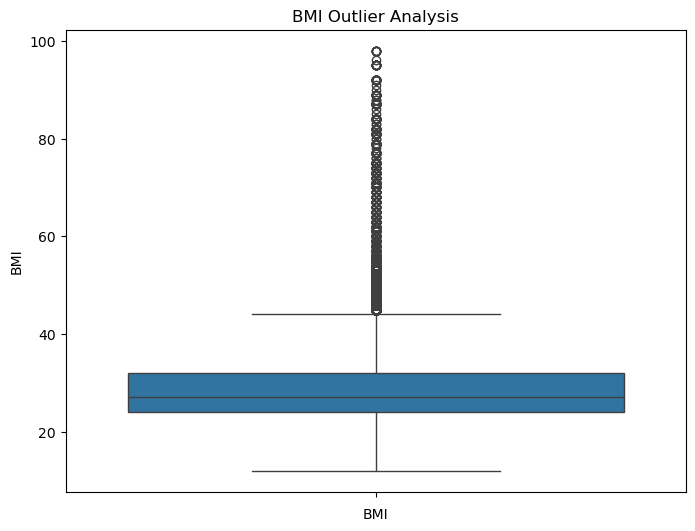

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['BMI'])
plt.title("BMI Outlier Analysis")
plt.xlabel("BMI")
plt.show()

We can bserve several outliers. If we decide to remove them, the result is this: 

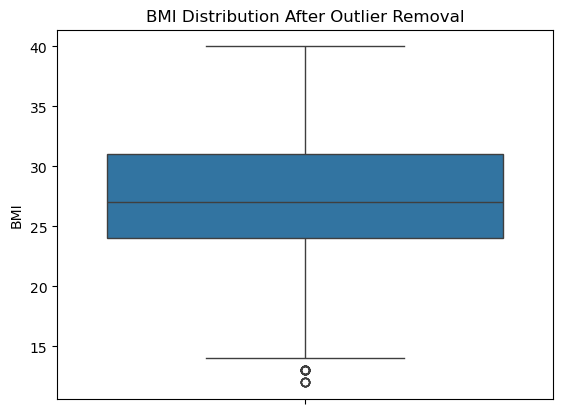

In [33]:
# Removing outliers beyond 95th percentile
bmi_threshold = data['BMI'].quantile(0.95)
data = data[data['BMI'] <= bmi_threshold]

# Re-check distribution and outliers
sns.boxplot(data['BMI'])
plt.title("BMI Distribution After Outlier Removal")
plt.show()

In [29]:
data.shape

(218310, 22)

We will perform a correlation analysis to understand relationships between features and the target variable (<b>Diabetes_012</b>).

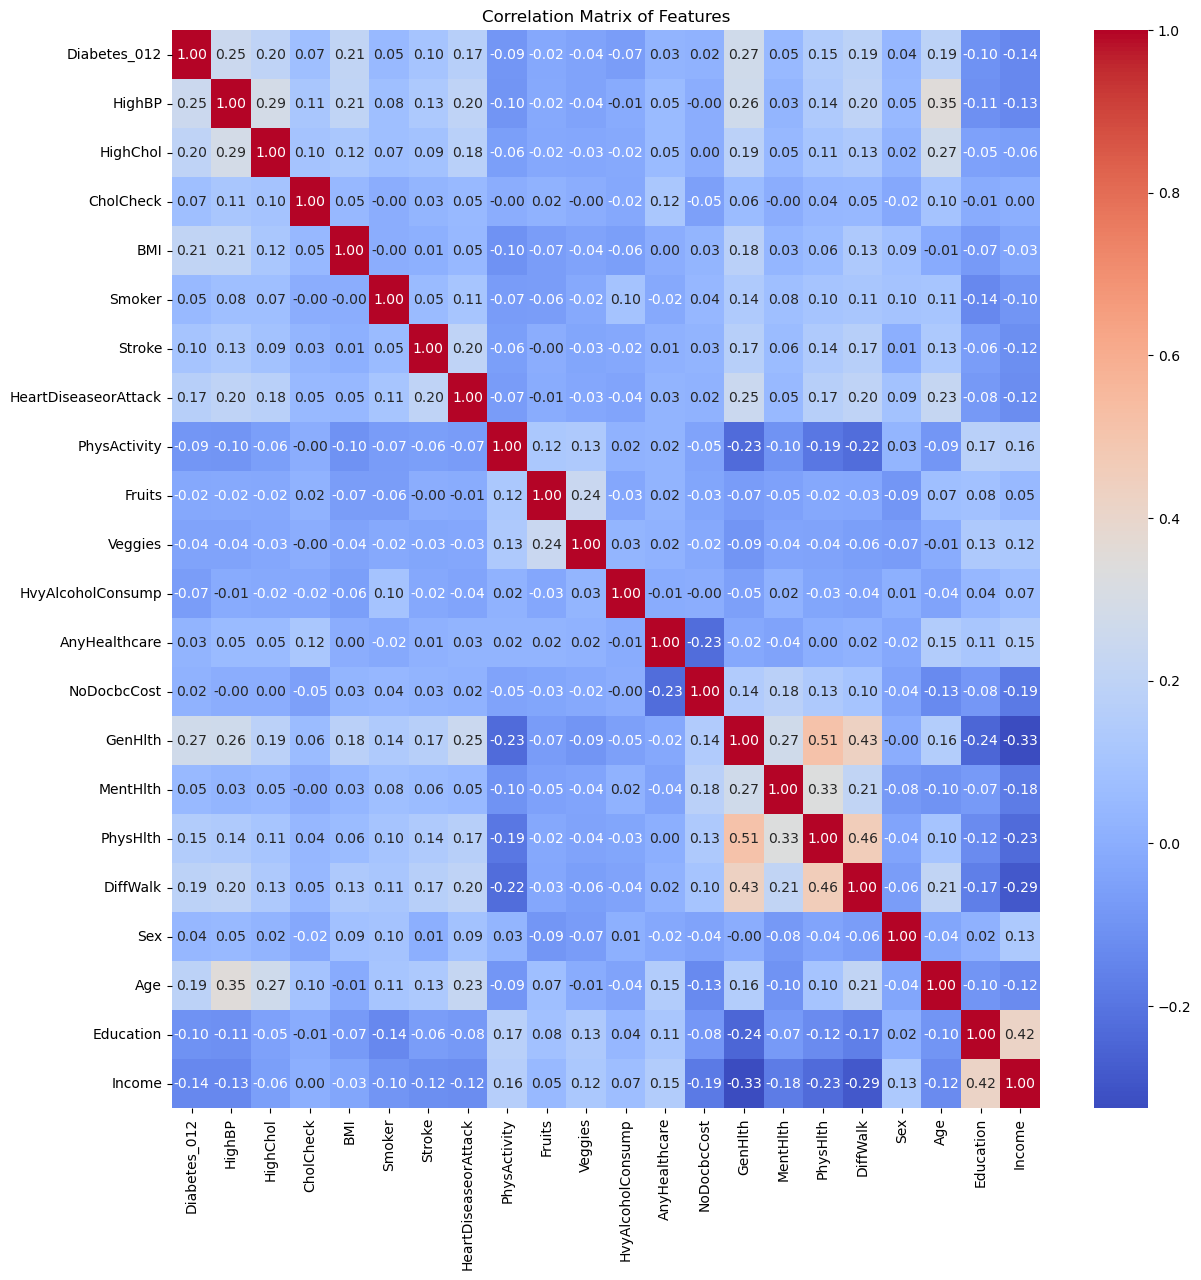

In [35]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

These results confirm that certain health factors, such as general health (GenHlth), high blood pressure (HighBP), and body mass index (BMI), are relevant for predicting diabetes.

## 4. Model Building and Training

<b> a) Splitting the Data </b>

We split our dataset into train and test (80% training, 20% testing) to ensure that our model has sufficient data to learn from while leaving enough data for testing.

We first scale features to ensure equal contribution during model training.

In [37]:
from sklearn import preprocessing

# Define features X and target varibale y
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

# If we decide to implement resampling techniques, such as SMOTE, to balance classes.
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

# Normalized the dataset
#X = preprocessing.StandardScaler().fit(X).transform(X)
X_resampled = preprocessing.StandardScaler().fit(X_resampled).transform(X_resampled)

In [39]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape) 

Train set: (438744, 21) (438744,)
Test set: (109686, 21) (109686,)


<b> b) Choosing Evaluation Metrics </b>

<b>Note</b>: In this dataset, there is a class imbalance in the target variable (Diabetes_012). Specifically, most instances are labeled as "No Diabetes," with fewer cases labeled as "Prediabetes" or "Diabetes." This imbalance means that standard accuracy alone isn’t sufficient because the model could simply predict "No Diabetes" for most instances and still achieve high accuracy—but this wouldn’t be useful, as it would overlook the minority classes (prediabetes and diabetes cases).

To get a better understanding of the model’s performance, we’ll use additional metrics that are more sensitive to the imbalanced nature of the data.

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Generate predictions 
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)  # Probabilities for ROC-AUC

# Calculate metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(y_test, y_proba, multi_class='ovr')

# Print metrics
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1-Score (Weighted):", f1)
print("AUC-ROC Score:", auc_roc)

Precision (Weighted): 0.9286024519022503
Recall (Weighted): 0.9260799008077604
F1-Score (Weighted): 0.9261245793424848
AUC-ROC Score: 0.980364519658492


The metrics indicate that your model is performing exceptionally well for predicting diabetes risk.

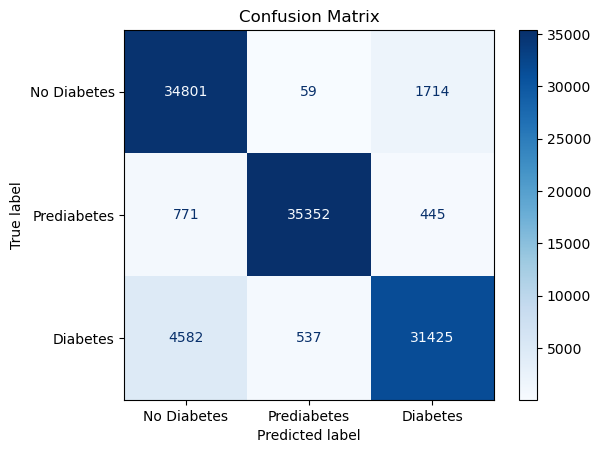

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Prediabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix indicates that your model is highly accurate in predicting diabetes and prediabetes, but there are areas to improve, particularly in reducing false negatives.

<b> c) Model Selection </b>

Testing multiple algorithms can help identify the most effective model. For this project, we’ll start with these commonly used models in classification tasks: Logistic Regression, Decision Tree, Random Forest and Gradient Boosting. 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Instantiate models
logreg = LogisticRegression(random_state=42, class_weight='balanced')
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')
xgboost = XGBClassifier(random_state=42, scale_pos_weight=10)  # Adjust scale for imbalanced data

To get the best performance from each model, we’ll perform hyperparameter tuning. We can use <b>GridSearchCV</b> or <b> RandomizedSearchCV</b> for hyperparameter tuning.

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score

# Define a function to perform RandomizedSearchCV for a given model and parameter grid
def tune_hyperparameters(model, param_grid, X_train, y_train):
    search = RandomizedSearchCV(model, param_grid, n_iter=10, scoring='f1_weighted', cv=3, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)
    return search

# 1. Logistic Regression Hyperparameter Tuning
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'solver': ['liblinear', 'saga']  # Algorithms to use
}
logreg_model = LogisticRegression(random_state=42, class_weight='balanced')

logreg_search = tune_hyperparameters(logreg_model, logreg_param_grid, X_train, y_train)
print("Best parameters for Logistic Regression: ", logreg_search.best_params_)
print("Best F1 score for Logistic Regression: ", logreg_search.best_score_)

# 2. Decision Tree Hyperparameter Tuning
dt_param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
dt_model = DecisionTreeClassifier(random_state=42)

dt_search = tune_hyperparameters(dt_model, dt_param_grid, X_train, y_train)
print("Best parameters for Decision Tree: ", dt_search.best_params_)
print("Best F1 score for Decision Tree: ", dt_search.best_score_)

# 3. Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_search = tune_hyperparameters(rf_model, rf_param_grid, X_train, y_train)
print("Best parameters for Random Forest: ", rf_search.best_params_)
print("Best F1 score for Random Forest: ", rf_search.best_score_)

# 4. XGBoost Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage
    'subsample': [0.5, 0.7, 1.0],  # Fraction of samples used for each tree
    'colsample_bytree': [0.5, 0.7, 1.0]  # Fraction of features used for each tree
}
xgb_model = XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)

xgb_search = tune_hyperparameters(xgb_model, xgb_param_grid, X_train, y_train)
print("Best parameters for XGBoost: ", xgb_search.best_params_)
print("Best F1 score for XGBoost: ", xgb_search.best_score_)

Best parameters for Logistic Regression:  {'solver': 'saga', 'penalty': 'l2', 'C': 100}
Best F1 score for Logistic Regression:  0.5126893292372025
Best parameters for Decision Tree:  {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'gini'}
Best F1 score for Decision Tree:  0.8396009425153071
Best parameters for Random Forest:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best F1 score for Random Forest:  0.9182781046616867
Best parameters for XGBoost:  {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.2, 'colsample_bytree': 0.7}
Best F1 score for XGBoost:  0.9109617240301621


Since the Random Forest model has the highest F1 score, it appears to be the most suitable model.

<b> d) Cross-Validation and Model Training </b>

Cross-validation (CV) is critical to ensure that our results are consistent and generalizable. By splitting the training data into smaller parts, we train the model on each subset and evaluate it on the remaining parts, which provides a more accurate measure of performance.

We can use <b> K-Fold Cross-Validation</b> or <b>Stratified K-Fold</b> (for imbalanced data) to ensure that each fold contains a proportional representation of each class.

In [55]:
# Import necessary libraries for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Define a custom scorer for F1 weighted score to handle class imbalance
f1_scorer = make_scorer(f1_score, average='weighted')

# Function to perform cross-validation and print the results
def perform_cross_validation(model, X, y, cv=5):
    # Perform cross-validation and compute mean and standard deviation of F1 scores
    scores = cross_val_score(model, X, y, cv=cv, scoring=f1_scorer, n_jobs=-1)
    print(f"Cross-Validation F1 Scores: {scores}")
    print(f"Mean F1 Score: {scores.mean():.4f}")
    print(f"Standard Deviation of F1 Scores: {scores.std():.4f}")
    return scores

# 1. Cross-Validation for Logistic Regression
print("Logistic Regression Cross-Validation Results:")
logreg_model = LogisticRegression(solver='saga', penalty='l2', C=100, random_state=42, class_weight='balanced')
logreg_cv_scores = perform_cross_validation(logreg_model, X_train, y_train)

# 2. Cross-Validation for Decision Tree
print("\nDecision Tree Cross-Validation Results:")
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_split=2, min_samples_leaf=2, random_state=42)
dt_cv_scores = perform_cross_validation(dt_model, X_train, y_train)

# 3. Cross-Validation for Random Forest
print("\nRandom Forest Cross-Validation Results:")
rf_model = RandomForestClassifier(n_estimators=500, max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=42, class_weight='balanced')
rf_cv_scores = perform_cross_validation(rf_model, X_train, y_train)

# 4. Cross-Validation for XGBoost
print("\nXGBoost Cross-Validation Results:")
xgb_model = XGBClassifier(subsample=1.0, n_estimators=500, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, random_state=42)
xgb_cv_scores = perform_cross_validation(xgb_model, X_train, y_train)

Logistic Regression Cross-Validation Results:
Cross-Validation F1 Scores: [0.51255226 0.51000774 0.51380258 0.51307694 0.5146602 ]
Mean F1 Score: 0.5128
Standard Deviation of F1 Scores: 0.0016

Decision Tree Cross-Validation Results:
Cross-Validation F1 Scores: [0.851719   0.85226717 0.85025283 0.85105959 0.84941175]
Mean F1 Score: 0.8509
Standard Deviation of F1 Scores: 0.0010

Random Forest Cross-Validation Results:
Cross-Validation F1 Scores: [0.92176591 0.92338622 0.92364097 0.92353793 0.92341049]
Mean F1 Score: 0.9231
Standard Deviation of F1 Scores: 0.0007

XGBoost Cross-Validation Results:
Cross-Validation F1 Scores: [0.91344386 0.91384988 0.91587272 0.91531837 0.9143348 ]
Mean F1 Score: 0.9146
Standard Deviation of F1 Scores: 0.0009


Based on these results, <b>Random Forest</b> is the top-performing model, followed closely by <b>XGBoost</b>.

<b> e) Model Training with the Entire Training Set </b>

We’ll train each model using the entire training dataset with the optimal hyperparameters found earlier. This will prepare the models for evaluation on the test set.

In [47]:
# Import necessary libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the models with the best parameters
# 1. Logistic Regression
logreg_model = LogisticRegression(solver='saga', penalty='l2', C=100, random_state=42, class_weight='balanced')
logreg_model.fit(X_train, y_train)

# 2. Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_split=2, min_samples_leaf=2, random_state=42)
dt_model.fit(X_train, y_train)

# 3. Random Forest
rf_model = RandomForestClassifier(n_estimators=500, max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 4. XGBoost
xgb_model = XGBClassifier(subsample=1.0, n_estimators=500, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, random_state=42)
xgb_model.fit(X_train, y_train)

print("Models have been trained on the entire training set.")

Models have been trained on the entire training set.


 We use joblib.dump to save the trained models (RandomForest and XGBoost in this case).

In [49]:
# Save trained models if needed, e.g., using joblib or pickle
import joblib
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(xgb_model, "xgboost_model.pkl")

print("Models trained and saved successfully.")

Models trained and saved successfully.


## 5.  Model Evaluation

The goal is to assess the performance of the trained models on unseen data (the test set). This evaluation allows us to understand how well each model generalizes to new data and helps us choose the best model for deployment.

Evaluation Results on Test Set:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.518571   0.510877  0.518571  0.510725
Decision Tree        0.867558   0.866887  0.867558  0.866350
Random Forest        0.927165   0.929585  0.927165  0.927208
XGBoost              0.918084   0.921680  0.918084  0.917411


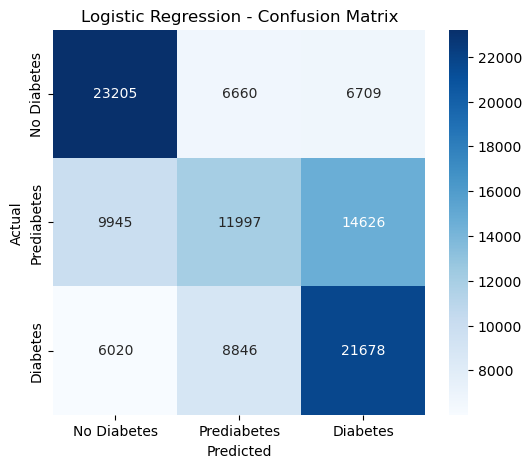

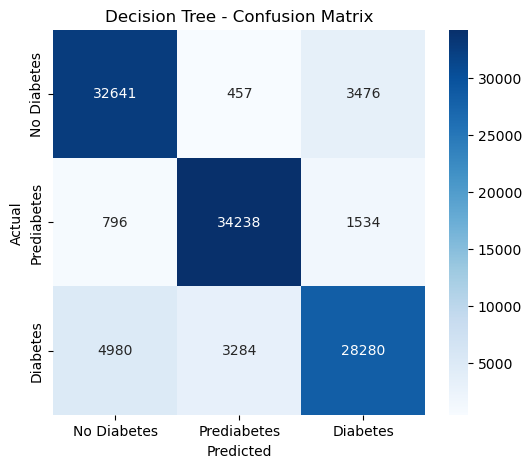

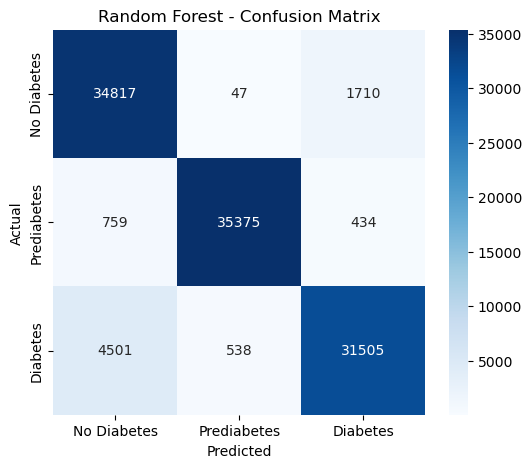

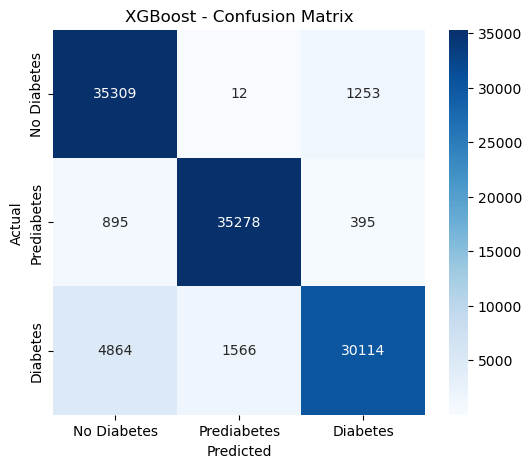

In [51]:
# Import necessary metrics and libraries
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Dictionary to store evaluation results
evaluation_results = {}

# Evaluate each model
models = {'Logistic Regression': logreg_model, 'Decision Tree': dt_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}

for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    evaluation_results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Display evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T
print("Evaluation Results on Test Set:")
print(evaluation_df)

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'], 
                yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrices
for model_name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, f"{model_name} - Confusion Matrix")


## 6. Conclusion

<b> Interpretation : </b>

* Based on the evaluation metrics, the <b>Random Forest</b> model outperforms the others with an accuracy of <b>92.72%</b>, indicating that it correctly classifies nearly 93% of the samples. Its F1 Score of <b>0.9272</b> reflects a balanced performance between precision and recall, making it a reliable choice for predicting diabetes risk.

* The <b>XGBoost</b> model also performs well with an accuracy of <b>91.81%</b> and a solid F1 Score of <b>0.9174</b>. While slightly less effective than Random Forest, it still shows a high level of predictive capability, particularly in identifying patients with diabetes and prediabetes.

* The <b>Decision</b> Tree model achieves an accuracy of <b>86.76%</b> and an F1 Score of <b>0.8664</b>, demonstrating good performance but with a noticeable gap compared to the ensemble methods. Its relatively simpler structure may contribute to this lower performance.

* In contrast, the <b>Logistic Regression</b> model displays the weakest results, with an accuracy of <b>51.86%</b> and an F1 Score of <b>0.5107</b>. This indicates that the model struggles significantly in accurately predicting diabetes risk, likely due to its linear nature which may not adequately capture the complexities present in the dataset.

In conclusion, based on the evaluation results, <b>Random Forest</b> is recommended as the best model for deployment in diabetes risk prediction due to its superior performance across all metrics. The robust handling of class imbalances and ability to capture nonlinear relationships in the data contribute to its effectiveness in this health-related context.

<b>Final Thoughts</b>

The predictive modeling efforts presented in this project represent a step toward using data-driven approaches in public health, particularly in addressing chronic diseases such as diabetes. By improving our ability to identify at-risk individuals, we can contribute to more effective preventative healthcare strategies and ultimately enhance the quality of life for many individuals. The journey does not end here; continued exploration and refinement of these models will be essential in the ongoing fight against diabetes and its associated complications.